# TCSS 588 Hands-on assignment #2 
## Mengting Weng, Guang Xu, Wenfei Yin (group_WXY)

## 1. Hierarchical clustering
## Write R code to apply hierarchical complete-link clustering algorithm to identify gene clusters from “gene_expression_n438x978.txt”.

In [28]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
dim (my.data)
my.data[1:5, 1:5]

[1] 438 978

,PSME1,ATF1,RHEB,FOXO3,RHOA
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959


In [29]:
my.data <-t(my.data)

In [30]:
source("https://bioconductor.org/biocLite.R")
biocLite(c("gplots", "cluster"))

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) 'gplots', 'cluster'
Warning message:
"package 'cluster' is in use and will not be installed"

package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mengting\AppData\Local\Temp\RtmpWSgARb\downloaded_packages


Old packages: 'BH', 'bindr', 'bindrcpp', 'broom', 'callr', 'car', 'caret',
  'checkpoint', 'cowplot', 'curl', 'data.table', 'DBI', 'dbplyr', 'ddalpha',
  'dendextend', 'digest', 'doParallel', 'DRR', 'ellipse', 'FactoMineR',
  'forcats', 'foreach', 'foreign', 'fpc', 'ggpubr', 'ggrepel', 'ggsci',
  'glmnet', 'gridExtra', 'haven', 'hexbin', 'hms', 'htmlwidgets', 'httpuv',
  'iterators', 'jsonlite', 'kernlab', 'knitr', 'lava', 'lme4', 'lubridate',
  'maps', 'MASS', 'Matrix', 'mclust', 'mgcv', 'mvtnorm', 'nlme', 'openssl',
  'packrat', 'pbdZMQ', 'pillar', 'png', 'prodlim', 'psych', 'quantmod',
  'quantreg', 'R6', 'randomForest', 'Rcpp', 'RcppEigen', 'RCurl', 'readxl',
  'recipes', 'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'RODBC',
  'rpart', 'rprojroot', 'rsconnect', 'RSQLite', 'RUnit', 'scatterplot3d',
  'selectr', 'sfsmisc', 'sourcetools', 'stringi', 'stringr', 'survival',
  'tidyr', 'tidyselect', 'timeDate', 'TTR', 'utf8', 'viridis', 'viridisLite',
  'withr', 'xml2', 'xts', '

## A:use the Euclidean distance to compute pairwise distances

In [31]:
d <- dist (my.data, method="euclidean")

In [32]:
ret.hclust1 <- hclust (d, method="complete")

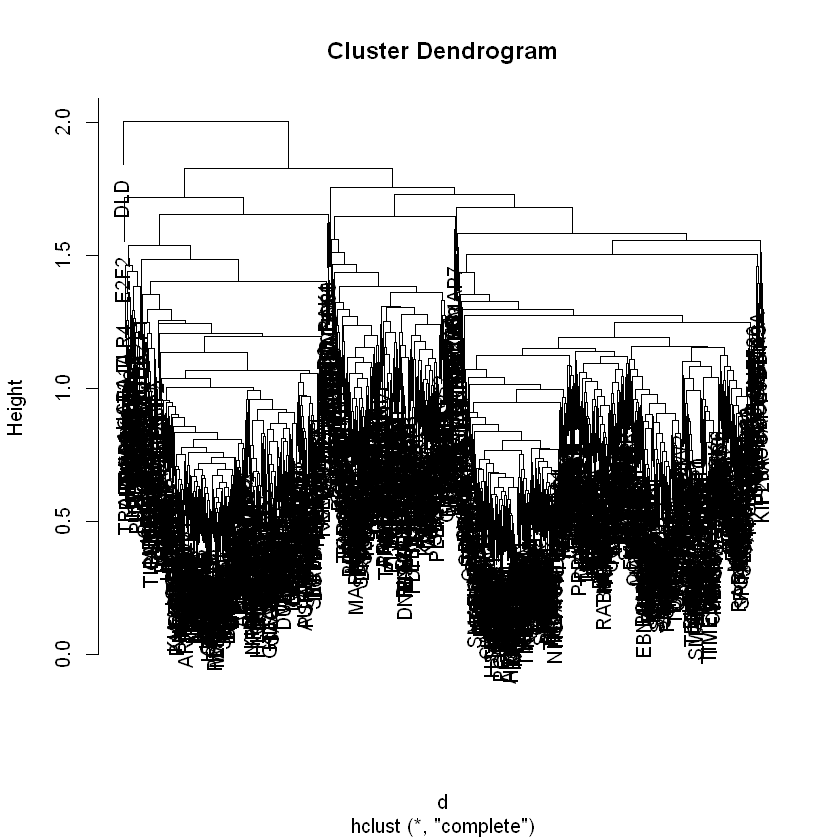

In [33]:
plot (ret.hclust1)

## B: use the correlation coefficient to compute pairwise distances

In [34]:
dd <- as.dist ((1- cor(t(my.data)))/2)

In [35]:
ret.hclust2 <- hclust (dd, method="complete")

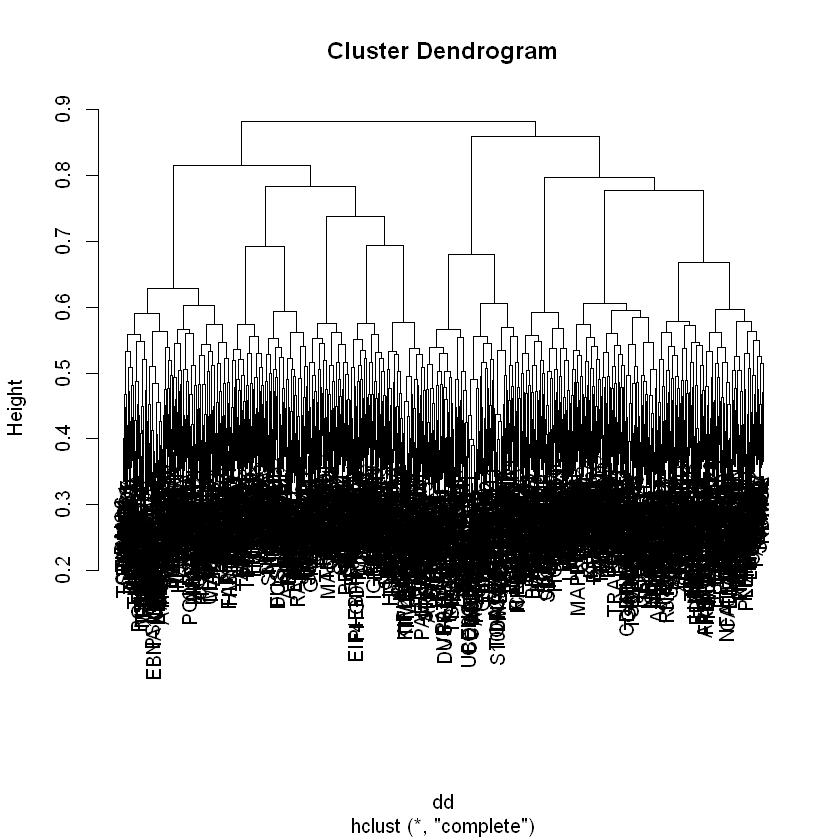

In [36]:
plot (ret.hclust2)

## C. Visualize the resulting clusters from (a) and (b) using heatmaps.

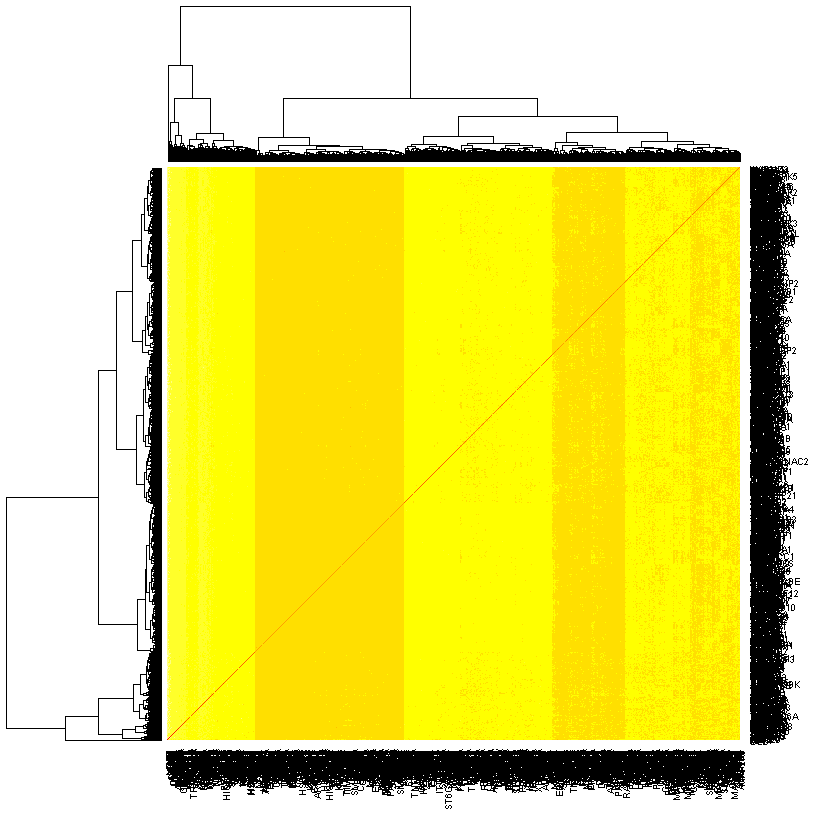

In [37]:
## Euclidean distance
heatmap (as.matrix (d))

In [38]:
## correlation coefficient 
newdist <- function (x) {as.dist (1-cor(t(x)))/2}

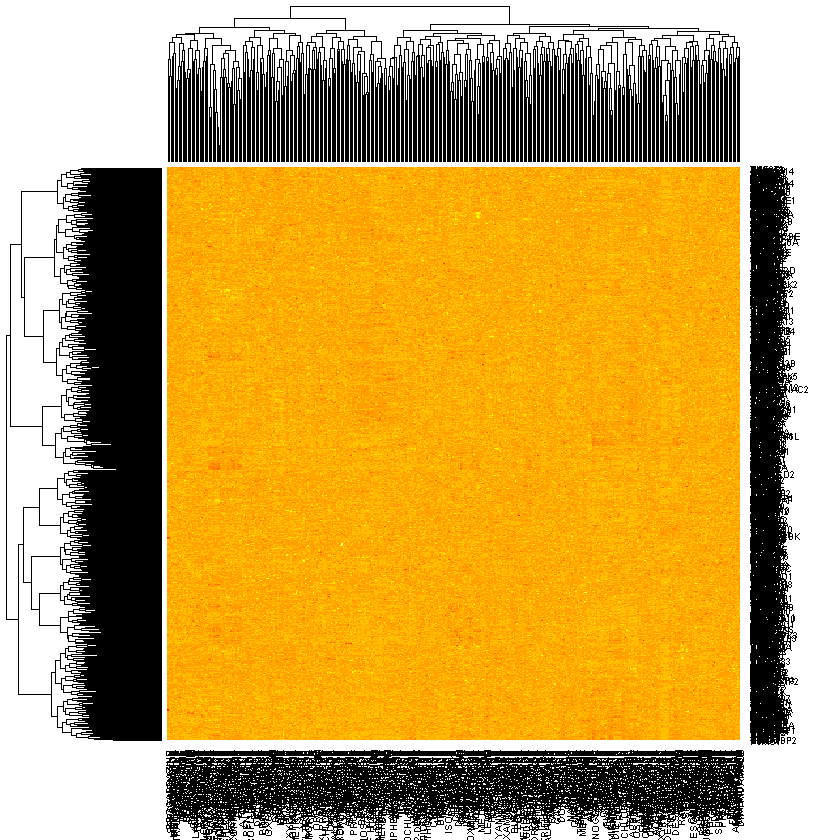

In [39]:
heatmap (as.matrix(my.data), distfun=newdist)

## D. What are the differences between these two pairwise distance measures?

### Euclidean distance is the square root of the sum of squared differences between corresponding elements of the two vectors.

### Euclidean distance was the sum of squared differences, correlation is basically the average product.

### Euclidean distance is only appropriate for data measured on the same scale.

## E. Compare the clusters obtained using the same algorithm(hierarchical completelink) but different distance measures.

In [40]:
d2 <- dist (my.data, method="maximum")

In [41]:
ret.hclust_d2 <- hclust (d2, method="complete")

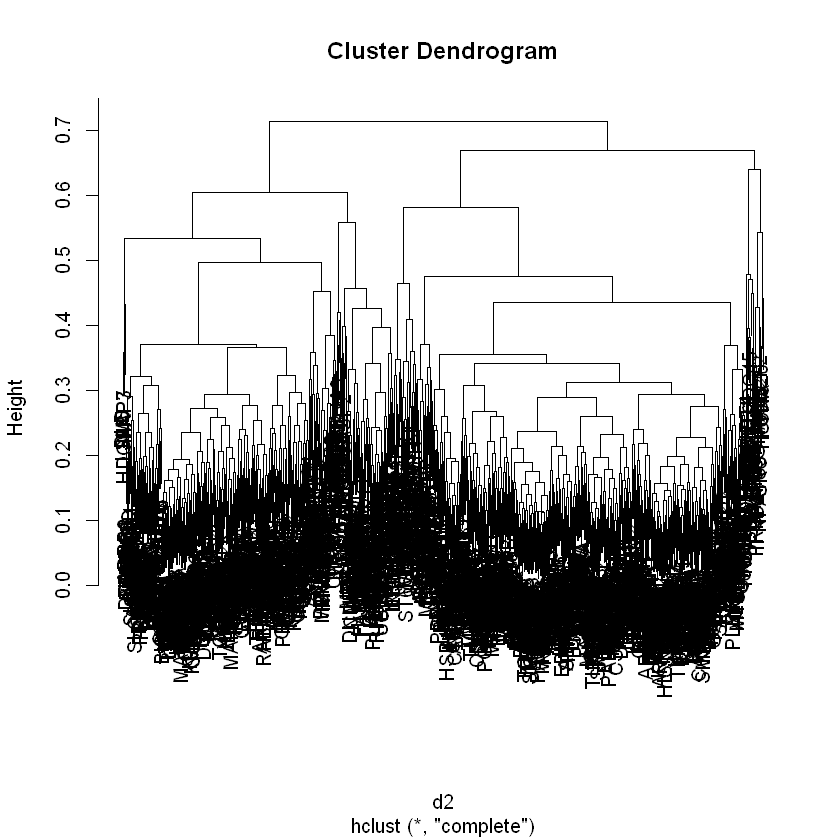

In [42]:
plot(ret.hclust_d2)

In [43]:
d3 <- dist (my.data, method="manhattan")

In [44]:
ret.hclust_d3 <- hclust (d3, method="complete")

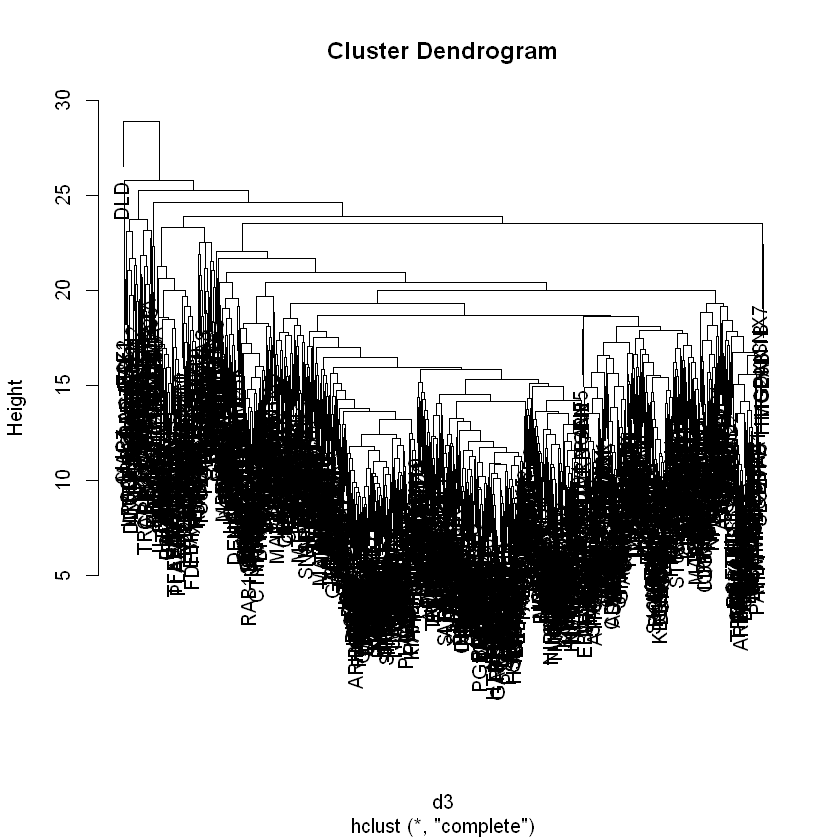

In [45]:
plot(ret.hclust_d3)

## 2. K-means clustering
## Write R code to apply k-means clustering algorithm to identify gene clusters from “gene_expression_n438x978.txt”.

## A. What did you use as the input number of clusters? Why?

### In order to get the proper input number of clusters, we generate k-means for K=2, 4, 6, ..., 100. 
### Compute the average silhouette. Plot the average silhouette against the number of clusters to see the curve.

In [27]:
library(cluster)

In [24]:
out.vec <- NULL
for (k in seq (2, 100, by=2)) {
    curr.kmeans <- kmeans (my.data, k)
    curr.sil <- silhouette (curr.kmeans$cluster, dist(my.data, method="euclidean"))
    out.vec <- c(out.vec, mean(curr.sil[,3]))
}

Warning message:
"did not converge in 10 iterations"

In [25]:
out.vec

[1]  0.0279996614  0.0150935523 -0.0006002927 -0.0123766628 -0.0136303160
 [6] -0.0106635794 -0.0071458412 -0.0233233391 -0.0182972949 -0.0306350504
[11] -0.0161735514 -0.0269126202 -0.0138101379 -0.0235303826 -0.0313258424
[16] -0.0461010046 -0.0159359250 -0.0177944103 -0.0361077346 -0.0261062941
[21] -0.0362291467 -0.0282148364 -0.0287963656 -0.0402126948 -0.0489500277
[26] -0.0367118808 -0.0388643487 -0.0358406378 -0.0515769563 -0.0520235264
[31] -0.0382504524 -0.0469688011 -0.0499538754 -0.0406328209 -0.0322259863
[36] -0.0453193927 -0.0338783634 -0.0385537821 -0.0449148421 -0.0293685212
[41] -0.0402457469 -0.0479715918 -0.0423786353 -0.0551870480 -0.0350492585
[46] -0.0394610290 -0.0391382668 -0.0459602994 -0.0438590496 -0.0457074213

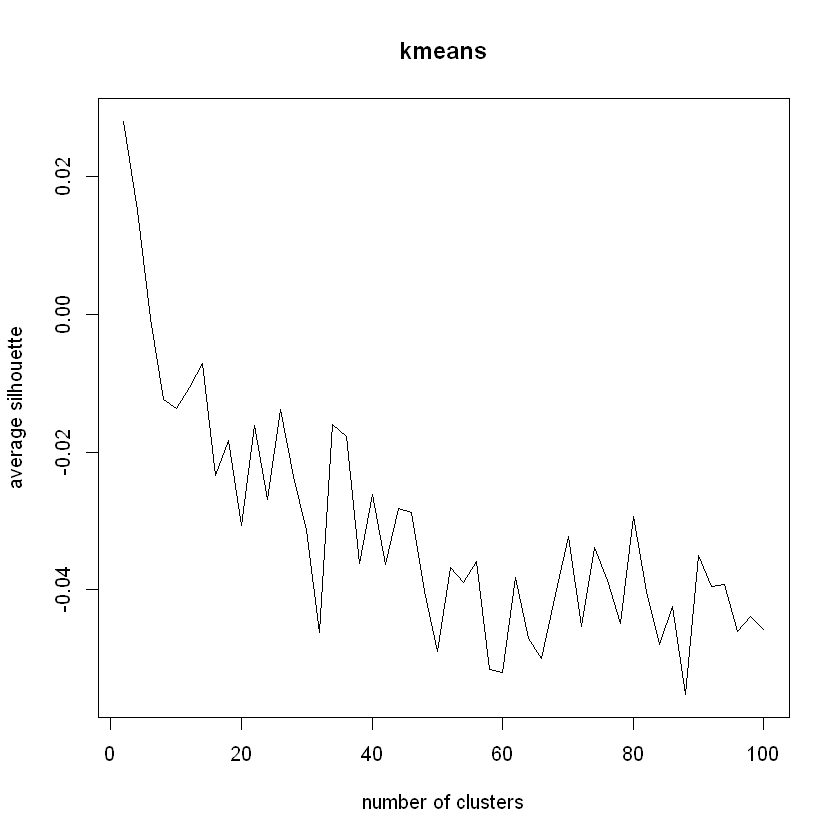

In [26]:
plot (seq(2, 100, by=2), out.vec, type="l", main="kmeans", xlab="number of clusters", ylab="average silhouette")

### So currently, we can see that when cluster number is 2, the average silhouette is largest. So we choose 2 as the cluster number.

## B. What is your cluster size distribution? In other words, did you get any small or large clusters? Discuss the cluster size distribution in your report

In [48]:
ret.kmeans <- kmeans (my.data, 2)

In [49]:
ret.kmeans$size

[1] 620 358

### Since we choose 2 as the cluster number, finally we get two groups. The first group (size: 620) is larger than the second group (size: 358)

## C. How are the resulting clusters from k-means different from those from hierarchical complete link? Discuss.

In [50]:
## clusters of hierarchical clustering with Euclidean distance
groups1 <- cutree (ret.hclust1, k=2)

In [52]:
sum (groups1 == 1)
sum (groups1 == 2)

[1] 977

[1] 1

In [53]:
## clusters of hierarchical clustering with correlation
groups2 <- cutree (ret.hclust2, k=2)
sum (groups2 == 1)
sum (groups2 == 2)

[1] 462

[1] 516

In [55]:
## clusters of hierarchical clustering with Maximum distance  
groups3 <- cutree (ret.hclust_d2, k=2)
sum (groups3 == 1)
sum (groups3 == 2)

[1] 566

[1] 412

In [56]:
## clusters of hierarchical clustering with Absolute distance
groups4 <- cutree (ret.hclust_d3, k=2)
sum (groups4 == 1)
sum (groups4 == 2)

[1] 977

[1] 1

### We also get the cluster size distribution from hierarchical clustering with different distance method. Compare with K-means cluster size distribution, we can see that the maximum distance method is the most close one.
### Another point we can see from the results, the cluster size distributions for those hierachical clustering are either very unbalanced or relatively balanced. 

## D. How do you visualize the resulting clusters? Discuss and show sample visualization images in the notebook

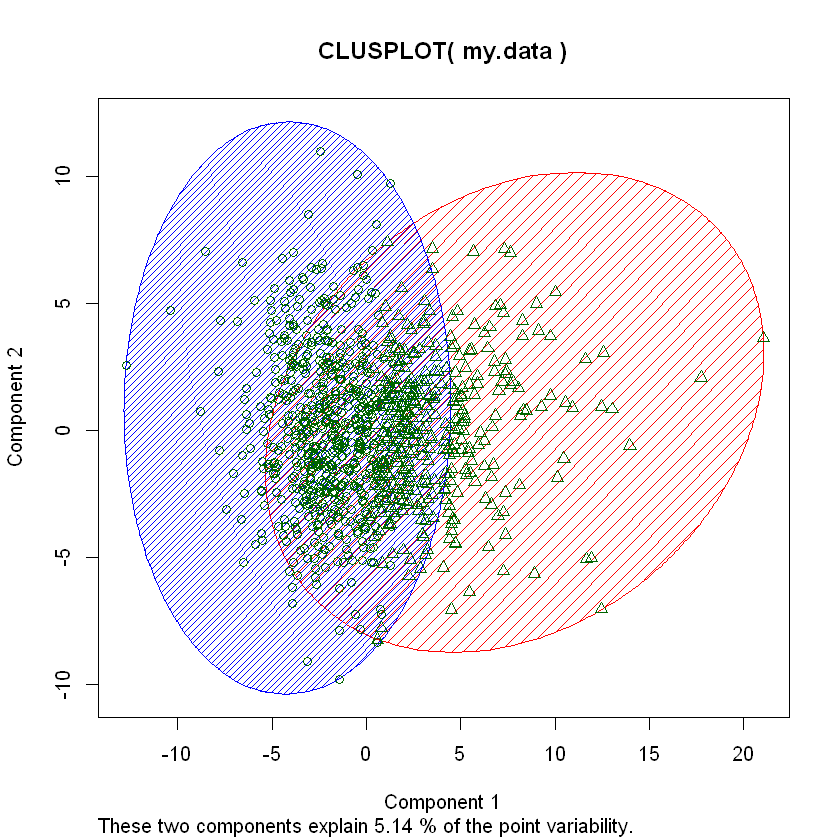

In [59]:
# Cluster Plot against 1st 2 principal components
# vary parameters for most readable graph
library(cluster) 
clusplot(my.data, ret.kmeans$cluster, color=TRUE, shade=TRUE, lines=0)

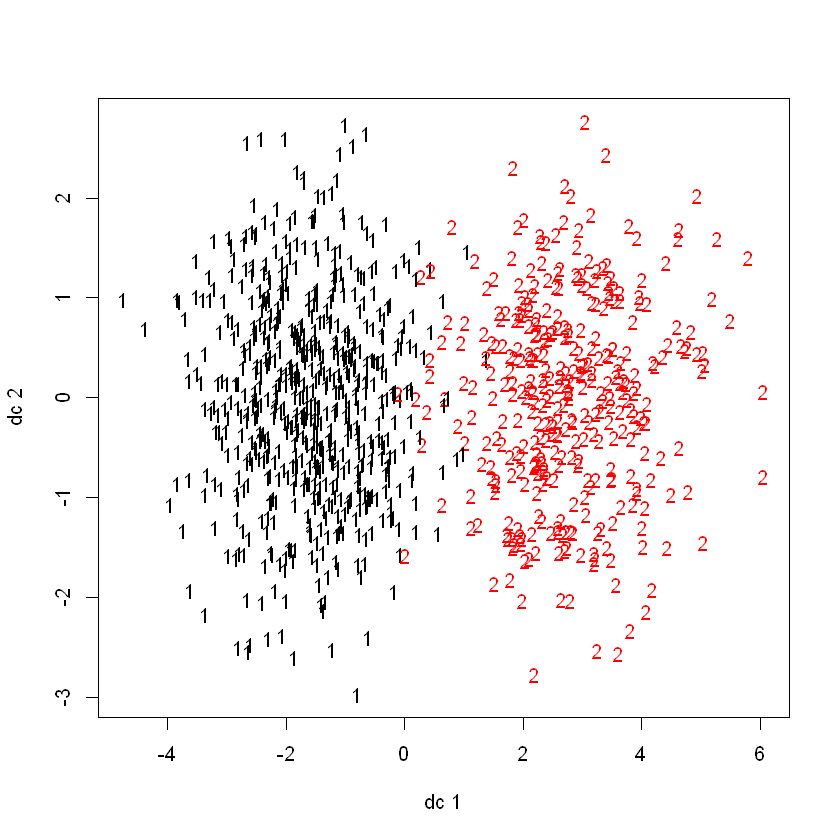

In [58]:
# Centroid Plot against 1st 2 discriminant functions
library(fpc)
plotcluster(my.data, ret.kmeans$cluster)